In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

In [19]:
df = pd.read_csv('./Cleaned_Aligned_Academic_Performance_Data.csv')

In [20]:
# Count the number of missing values per column
missing_count = df.isnull().sum()
print(missing_count)

Marital status;Application mode;Application order;Course    0
Daytime/evening attendance                                  0
Previous qualification                                      0
Previous qualification (grade)                              0
Nacionality                                                 0
Mother's qualification                                      0
Father's qualification                                      0
Mother's occupation                                         0
Father's occupation                                         0
Admission grade                                             0
Displaced                                                   0
Educational special needs                                   0
Debtor                                                      0
Tuition fees up to date                                     0
Gender                                                      0
Scholarship holder                                          0
Age at e

In [21]:
df = pd.DataFrame(df)

# Defines the mapping rule
mapping_rules = {
    'Dropout': 0,
    'Graduate': 1,
    'Enrolled': 2
}

# Transformation was performed using the replace method
df['Target"'] = df['Target"'].replace(mapping_rules)

# Print out the processed data
print(df)

      Marital status;Application mode;Application order;Course  \
0                                                   171          
1                                                  9254          
2                                                  9070          
3                                                  9773          
4                                                  8014          
...                                                 ...          
4419                                               9773          
4420                                               9773          
4421                                               9500          
4422                                               9147          
4423                                               9773          

      Daytime/evening attendance  Previous qualification  \
0                              1                       1   
1                              1                       1   
2                          

In [22]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Make scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [23]:
def detect_and_remove_outliers(df):

    cleaned_df = df.copy()
    
    for column in df.columns:

        mean = df[column].mean()
        std = df[column].std()
        

        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        
    
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f'Outliers in column {column}: \n{outliers}')
        

        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
    
    return cleaned_df

In [31]:

cleaned_df = detect_and_remove_outliers(df)


print("\nCleaned Data:")
print(cleaned_df['Target"'])

Outliers in column Marital status;Application mode;Application order;Course: 
      Marital status;Application mode;Application order;Course  \
0                                                   171          
20                                                  171          
35                                                   33          
59                                                  171          
62                                                  171          
...                                                 ...          
4331                                                171          
4353                                                171          
4365                                                171          
4370                                                171          
4413                                                 33          

      Daytime/evening attendance  Previous qualification  \
0                              1                       1   
20       


Pearson Correlation Matrix:
                                                    Marital status;Application mode;Application order;Course  \
Marital status;Application mode;Application ord...                                           1.000000          
Daytime/evening attendance                                                                  -0.043151          
Previous qualification                                                                       0.006654          
Previous qualification (grade)                                                              -0.081013          
Nacionality                                                                                 -0.033923          
Mother's qualification                                                                       0.054543          
Father's qualification                                                                       0.050724          
Mother's occupation                                                        

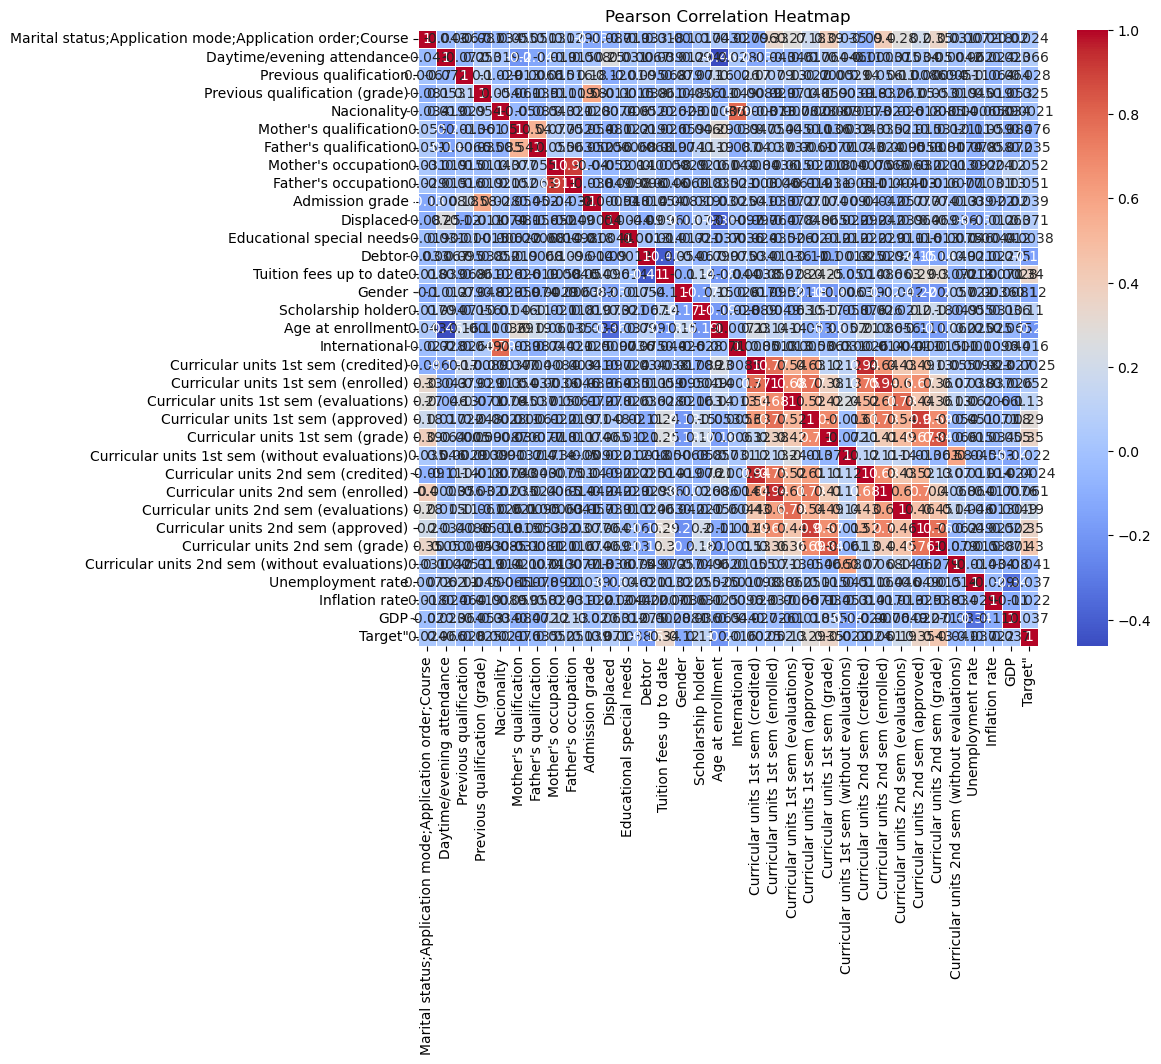

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

pearson_corr = df.corr(method='pearson')
print("\nPearson Correlation Matrix:")
print(pearson_corr)


spearman_corr = df.corr(method='spearman')
print("\nSpearman Correlation Matrix:")
print(spearman_corr)

# Draw the Pearson correlation heat map
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [38]:
# Divide between the training set and the test sets
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import numpy as np


X = cleaned_df.drop(columns=['Target"'])  
y = cleaned_df['Target"']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Calculate the class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 1.0936329588014981, 1: 0.6508172362555721, 2: 1.8212058212058213}